# **EV CAR PRICE PREDICTION**

## 1) DATA EXPLORATION
The first part of this notebook will be composed of loading, exploring & cleaning the data.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
#Read dataset.
df = pd.read_csv("data/EV_cars.csv")

In [3]:
#Re-arranging columns, easier to read.
df = df[['Car_name', 'Battery', 'Efficiency', 'Fast_charge', 'Range', 'Top_speed', 'acceleration..0.100.', 'Price']]

In [4]:
#Show dataset.
df

,Car_name,Battery,Efficiency,Fast_charge,Range,Top_speed,acceleration..0.100.,Price
0,Tesla Model Y Long Range Dual Motor,75.0,172,670.0,435,217,5.0,59017.0
1,Tesla Model 3,57.5,137,700.0,420,201,6.1,46220.0
2,BYD ATTO 3,60.5,183,370.0,330,160,7.3,44625.0
3,MG MG4 Electric 64 kWh,61.7,171,630.0,360,160,7.9,39990.0
4,Tesla Model 3 Long Range Dual Motor,75.0,149,780.0,505,201,4.4,55220.0
...,...,...,...,...,...,...,...,...
355,Citroen e-Jumpy Combi XL 50 kWh,46.3,257,290.0,180,130,12.1,52730.0
356,Fiat E-Ulysse L2 50 kWh,46.3,250,290.0,185,130,12.1,55990.0
357,Opel Vivaro-e Combi L 50 kWh,46.3,257,290.0,180,130,12.1,51825.0
358,Opel Zafira-e Life M 75 kWh,68.0,257,290.0,265,130,13.3,69250.0


In [5]:
#Check features and number of columns.
df.columns, len(df.columns)

(Index(['Car_name', 'Battery', 'Efficiency', 'Fast_charge', 'Range',
        'Top_speed', 'acceleration..0.100.', 'Price'],
       dtype='object'),
 8)

<Axes: ylabel='Frequency'>

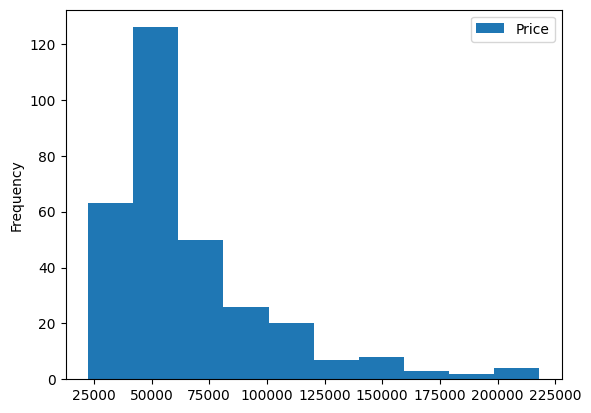

In [6]:
#Check histogram.
df.plot.hist(y='Price')

In [7]:
#Check for missing values:
#Filter: convert df into a dataframe where NaN or Null values will become True using df.isnull(); 
#and return rows that contain those True values using df.any() along axis=1 (columns axis) 
df[df.isnull().any(axis=1)]

,Car_name,Battery,Efficiency,Fast_charge,Range,Top_speed,acceleration..0.100.,Price
16,Rolls-Royce Spectre,100.0,220,540.0,455,250,4.5,NaN
19,Hongqi E-HS9 99 kWh,90.0,243,430.0,370,200,4.9,NaN
30,Audi Q4 e-tron 40,76.6,189,630.0,405,160,8.5,NaN
40,Peugeot e-3008 73 kWh,73.0,183,460.0,400,180,7.0,NaN
49,Renault Twingo Electric,21.3,158,NaN,135,135,12.6,28000.0
61,Mercedes EQA 250+,70.5,168,580.0,420,160,8.6,NaN
63,Opel Corsa-e,46.3,157,470.0,295,150,8.1,NaN
66,Polestar 4 Long Range Dual Motor,94.0,202,690.0,465,200,3.8,NaN
69,Peugeot e-3008 98 kWh Long Range,98.0,188,680.0,520,180,7.0,NaN
70,Hyundai IONIQ 5 N,80.0,208,950.0,385,260,3.4,NaN


In [8]:
#Dropping any rows with missing values
df = df.dropna()

In [9]:
#Check final shape of usable data.
df.shape

(307, 8)

In [10]:
#Checking for correlations:
df.loc[:,'Battery':'Price'].corr()['Price']

Battery                 0.702036
Efficiency              0.174505
Fast_charge             0.618951
Range                   0.589158
Top_speed               0.760579
acceleration..0.100.   -0.532272
Price                   1.000000
Name: Price, dtype: float64

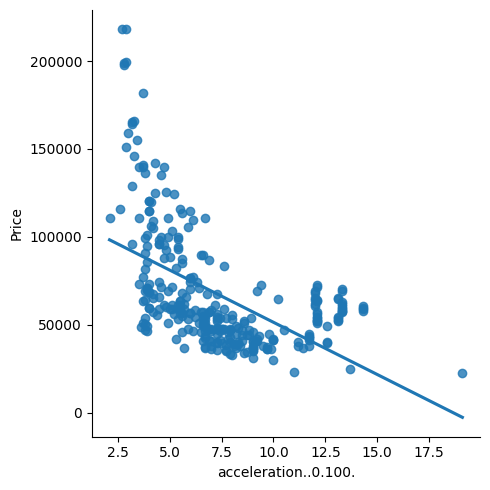

In [11]:
#Checking why accelaration is not correlated to price:
import seaborn as sb
sb.lmplot(x='acceleration..0.100.', y='Price', data=df, fit_reg=True, ci=None)

## 2) Building the Model
The second part of this notebook will be choosing and building a learning model.
<br> - Two models will be built, one with acceleration 0-100 feature and one without it.
<br>- Algorithm used: Multiple Linear Regression.

### 1st Model

In [12]:
#1st model with acceleration 0-100 feature as well:
from linear_model import * # sklearn can be used instead.
model1 = LinearModel()

In [13]:
#Converting 80% of data to numpy array for training:
train1 = df.iloc[:245, 1:].to_numpy()

In [14]:
#Check shape. Should be 6 features with 1 target column.
train1.shape

(245, 7)

In [15]:
#Normalizing training dataset:
train_norm1, mu1, sigma1 = model1.zscore_normalize(train1)

In [16]:
#Set x (normalized) and y (normalized) for training:
x_norm = train_norm1[:, :6]
y_norm = train_norm1[:, 6]

In [17]:
#Check shape. x should have 6 features.
x_norm.shape, y_norm.shape

((245, 6), (245,))

In [18]:
#Training the 1st model:
import time

alpha = 0.05
iterations = 10000
w_ini = np.arange(0, x_norm.shape[1], 1)
b_ini = 100

tic = time.time()
w, b, cost = model1.gradient_descent(x_norm, y_norm, w_ini, b_ini, alpha, iterations)
toc = time.time()

print(f'Time: {round(toc-tic, 2)} s')

Time: 16.81 s


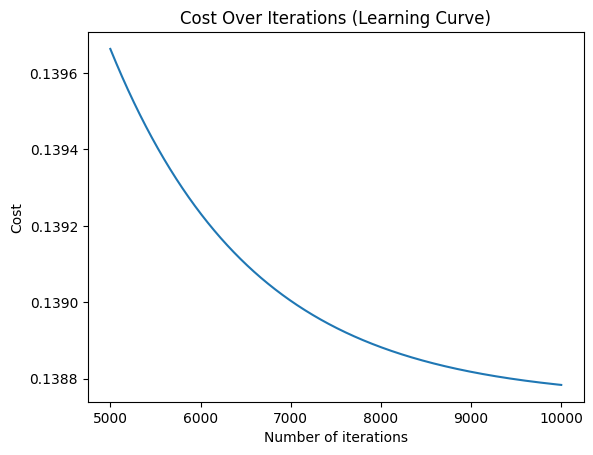

In [19]:
#Plotting the Learning Curve.
from matplotlib import pyplot as plt
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost Over Iterations (Learning Curve)")
plt.plot(np.arange(5000, iterations, 1), cost[5000:])
plt.show()

In [20]:
#Check weights and bias after training.
w, b

(array([ 0.47667702,  0.03808985,  0.04328878, -0.11322123,  0.615105  ,
         0.15055143]),
 1.1100841680135751e-16)

In [21]:
#Converting 20% of data to numpy array for testing.
test = df.iloc[245:, 1:7].to_numpy()

In [22]:
#Check shape. Should be 6 columns.
test.shape

(62, 6)

In [23]:
#Normalizing the test dataset with sigma1 and mu1.
test_norm = (test-mu1[:6])/sigma1[:6]

In [24]:
#Computing the 1st set of predictions.
prediction1 = model1.compute_fwb(test_norm, w, b)

In [25]:
#Denormalizing predictions with sigma1 and mu1.
prediction1_denorm = prediction1*sigma1[6] + mu1[6]
prediction1_denorm = np.round(prediction1_denorm, 1)

In [26]:
#Visualizing the 1st set of predictions with actual price:
test_df = df.iloc[245:, :]
test_df = test_df.assign(prediction1=prediction1_denorm)

In [27]:
test_df

,Car_name,Battery,Efficiency,Fast_charge,Range,Top_speed,acceleration..0.100.,Price,prediction1
291,Mercedes EQE AMG 43 4MATIC,90.6,195,690.0,465,210,4.2,104756.0,87746.6
292,Mercedes EQA 300 4MATIC,66.5,187,510.0,355,160,7.7,53520.0,47615.1
294,Citroen e-SpaceTourer M 50 kWh,46.3,250,290.0,185,130,12.1,53640.0,30613.5
295,Abarth 500e Hatchback,37.8,168,370.0,225,155,7.0,37990.0,24302.2
296,Mercedes EQE SUV AMG 53 4MATIC+,90.6,221,610.0,410,240,3.5,139438.0,108167.5
...,...,...,...,...,...,...,...,...,...
355,Citroen e-Jumpy Combi XL 50 kWh,46.3,257,290.0,180,130,12.1,52730.0,31171.1
356,Fiat E-Ulysse L2 50 kWh,46.3,250,290.0,185,130,12.1,55990.0,30613.5
357,Opel Vivaro-e Combi L 50 kWh,46.3,257,290.0,180,130,12.1,51825.0,31171.1
358,Opel Zafira-e Life M 75 kWh,68.0,257,290.0,265,130,13.3,69250.0,46828.1


In [28]:
#Calculating the mean absolute error between 1st prediction and actual price.
from sklearn.metrics import mean_absolute_error
mean_error1 = mean_absolute_error(test_df['Price'], test_df['prediction1'])
mean_error1

19809.964516129025

In [29]:
#Checking the std of the data. mean_error1 should be less then std.
df.describe()['Price']

count       307.000000
mean      67529.882736
std       34462.344923
min       22550.000000
25%       45867.500000
50%       56950.000000
75%       73624.500000
max      218000.000000
Name: Price, dtype: float64

In [30]:
#Visualizing error and accuracy of 1st set of predictions with actual price.
test_df = test_df.assign(error=(test_df['prediction1']-test_df['Price']).round(3).abs())
test_df = test_df.assign(accuracy=(test_df['prediction1']/test_df['Price']).round(3)*100)

In [31]:
test_df

,Car_name,Battery,Efficiency,Fast_charge,Range,Top_speed,acceleration..0.100.,Price,prediction1,error,accuracy
291,Mercedes EQE AMG 43 4MATIC,90.6,195,690.0,465,210,4.2,104756.0,87746.6,17009.4,83.8
292,Mercedes EQA 300 4MATIC,66.5,187,510.0,355,160,7.7,53520.0,47615.1,5904.9,89.0
294,Citroen e-SpaceTourer M 50 kWh,46.3,250,290.0,185,130,12.1,53640.0,30613.5,23026.5,57.1
295,Abarth 500e Hatchback,37.8,168,370.0,225,155,7.0,37990.0,24302.2,13687.8,64.0
296,Mercedes EQE SUV AMG 53 4MATIC+,90.6,221,610.0,410,240,3.5,139438.0,108167.5,31270.5,77.6
...,...,...,...,...,...,...,...,...,...,...,...
355,Citroen e-Jumpy Combi XL 50 kWh,46.3,257,290.0,180,130,12.1,52730.0,31171.1,21558.9,59.1
356,Fiat E-Ulysse L2 50 kWh,46.3,250,290.0,185,130,12.1,55990.0,30613.5,25376.5,54.7
357,Opel Vivaro-e Combi L 50 kWh,46.3,257,290.0,180,130,12.1,51825.0,31171.1,20653.9,60.1
358,Opel Zafira-e Life M 75 kWh,68.0,257,290.0,265,130,13.3,69250.0,46828.1,22421.9,67.6


### 2nd Model

In [32]:
#2nd model without the acceleration 0-100 feature.
model2 = LinearModel()

In [33]:
#Removing the acceleration 0-100 feature.
train2 = np.delete(train1, 5, axis=1)

In [34]:
#Checking shape. Should be 5 features with 1 target column.
train2.shape

(245, 6)

In [35]:
#Normalizing 2nd training dataset.
train2_norm, mu2, sigma2 = model2.zscore_normalize(train2)

In [36]:
#Set x (normalized) and y (normalized) for training.
x_norm = train2_norm[:, :5]
y_norm = train2_norm[:, 5]

In [37]:
#Training the 2nd model:
alpha = 0.05
iterations = 10000
w_ini = np.arange(0, x_norm.shape[1], 1)
b_ini = 100

tic = time.time()
w, b, cost = model2.gradient_descent(x_norm, y_norm, w_ini, b_ini, alpha, iterations)
toc = time.time()

print(f'Time: {toc-tic}s')

Time: 15.488189697265625s


Text(0.5, 1.0, 'Cost over Iterations (Learning Curve)')

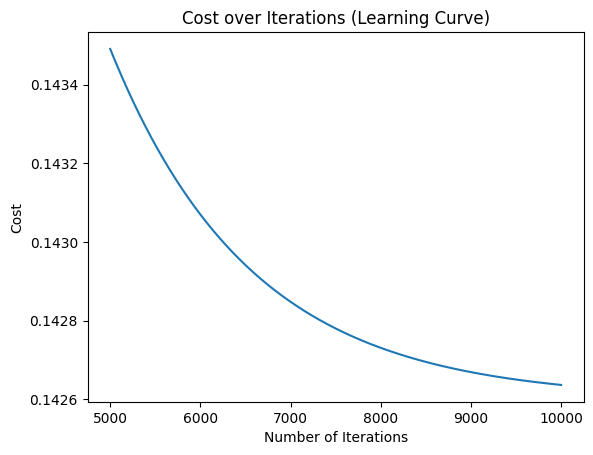

In [38]:
#Plotting the Learning Curve.
plt.plot(np.arange(5000, iterations, 1), cost[5000:])
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations (Learning Curve)')

In [39]:
#Set test data for 2nd model. 
#Since acceleration 0-100 is the 6th column (index 5), we can re-use the old test dataset without including the 6th column.
test2 = test[:, :5]

In [40]:
#Check shape. Should be 5 features without the acceleration 0-100 column.
test2.shape

(62, 5)

In [41]:
#Normazling 2nd dataset with mu2 and sigma2.
test2_norm = (test2-mu2[:5])/sigma2[:5]

In [42]:
#Computing the predcitions.
prediction2 = model2.compute_fwb(test2_norm, w, b)

In [43]:
#Denormalzing the predictions with mu2 and sigma2.
prediction2_denorm = np.round(prediction2*sigma2[5] + mu2[5])

In [44]:
#Visualizing the 2nd set of predictions with actual price.
test_df = test_df.assign(prediction2 = prediction2_denorm)

In [45]:
test_df

,Car_name,Battery,Efficiency,Fast_charge,Range,Top_speed,acceleration..0.100.,Price,prediction1,error,accuracy,prediction2
291,Mercedes EQE AMG 43 4MATIC,90.6,195,690.0,465,210,4.2,104756.0,87746.6,17009.4,83.8,89463.0
292,Mercedes EQA 300 4MATIC,66.5,187,510.0,355,160,7.7,53520.0,47615.1,5904.9,89.0,48499.0
294,Citroen e-SpaceTourer M 50 kWh,46.3,250,290.0,185,130,12.1,53640.0,30613.5,23026.5,57.1,30155.0
295,Abarth 500e Hatchback,37.8,168,370.0,225,155,7.0,37990.0,24302.2,13687.8,64.0,28107.0
296,Mercedes EQE SUV AMG 53 4MATIC+,90.6,221,610.0,410,240,3.5,139438.0,108167.5,31270.5,77.6,109164.0
...,...,...,...,...,...,...,...,...,...,...,...,...
355,Citroen e-Jumpy Combi XL 50 kWh,46.3,257,290.0,180,130,12.1,52730.0,31171.1,21558.9,59.1,31117.0
356,Fiat E-Ulysse L2 50 kWh,46.3,250,290.0,185,130,12.1,55990.0,30613.5,25376.5,54.7,30155.0
357,Opel Vivaro-e Combi L 50 kWh,46.3,257,290.0,180,130,12.1,51825.0,31171.1,20653.9,60.1,31117.0
358,Opel Zafira-e Life M 75 kWh,68.0,257,290.0,265,130,13.3,69250.0,46828.1,22421.9,67.6,42249.0


In [46]:
#Calculating mean absolute error between 2nd prediction and actual price.
mean_error2 = mean_absolute_error(test_df['Price'], test_df['prediction2'])
mean_error2, mean_error1

(20961.129032258064, 19809.964516129025)

In [47]:
#Visualizing error and accuracy of 2nd set of predictions with actual price.
test_df = test_df.assign(error2=(test_df['prediction2'] - test_df['Price']).round(3).abs())
test_df = test_df.assign(accuracy2=(test_df['prediction2']/test_df['Price']).round(3)*100)

In [48]:
test_df

,Car_name,Battery,Efficiency,Fast_charge,Range,Top_speed,acceleration..0.100.,Price,prediction1,error,accuracy,prediction2,error2,accuracy2
291,Mercedes EQE AMG 43 4MATIC,90.6,195,690.0,465,210,4.2,104756.0,87746.6,17009.4,83.8,89463.0,15293.0,85.4
292,Mercedes EQA 300 4MATIC,66.5,187,510.0,355,160,7.7,53520.0,47615.1,5904.9,89.0,48499.0,5021.0,90.6
294,Citroen e-SpaceTourer M 50 kWh,46.3,250,290.0,185,130,12.1,53640.0,30613.5,23026.5,57.1,30155.0,23485.0,56.2
295,Abarth 500e Hatchback,37.8,168,370.0,225,155,7.0,37990.0,24302.2,13687.8,64.0,28107.0,9883.0,74.0
296,Mercedes EQE SUV AMG 53 4MATIC+,90.6,221,610.0,410,240,3.5,139438.0,108167.5,31270.5,77.6,109164.0,30274.0,78.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Citroen e-Jumpy Combi XL 50 kWh,46.3,257,290.0,180,130,12.1,52730.0,31171.1,21558.9,59.1,31117.0,21613.0,59.0
356,Fiat E-Ulysse L2 50 kWh,46.3,250,290.0,185,130,12.1,55990.0,30613.5,25376.5,54.7,30155.0,25835.0,53.9
357,Opel Vivaro-e Combi L 50 kWh,46.3,257,290.0,180,130,12.1,51825.0,31171.1,20653.9,60.1,31117.0,20708.0,60.0
358,Opel Zafira-e Life M 75 kWh,68.0,257,290.0,265,130,13.3,69250.0,46828.1,22421.9,67.6,42249.0,27001.0,61.0


## 3) Conclusion
The 3rd part of this notebook will conclude the result of the 2 models.
<br>- Accuracy of the 2nd model's prediction (with accleration 0-100 feature) are slightly higher than the first model (without the acceleration 0-100 feature).
<br>- Both models predict car prices at around $50000 with the most accuracy (since most training data is distributed around there).
<br>- Different choices of alpha and longer training (more iterations) can result in more accurate predictions, aswell as more training data, regularization, ...
<br>- More modern methods can be used to increase accuracy of the model's prediction (e.g. neural networks, ...).